In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import floor
from sklearn.cluster import KMeans
from credible_ball import calculate_credible_ball
from plot import plot_credibleball

# Simulated Examples

In [6]:
def generate_data(n, sigma):
    X = []
    for _ in range(n):
        x = 0
        for j in range(1, 5):
            x += np.random.multivariate_normal(mean = [2 * (-1) ** floor((j - 1) / 2), 2 * (-1) ** (j - 1)],
                                               cov = np.array([[sigma[0] ** 2, 0], [0, sigma[1] ** 2]]))
        X.append(x)
    return np.array(X)


In [9]:
n = 200
X1 = generate_data(n, [1, 1])    #dataset1
X2 = generate_data(n, [0.5, 1.5])    #dataset2

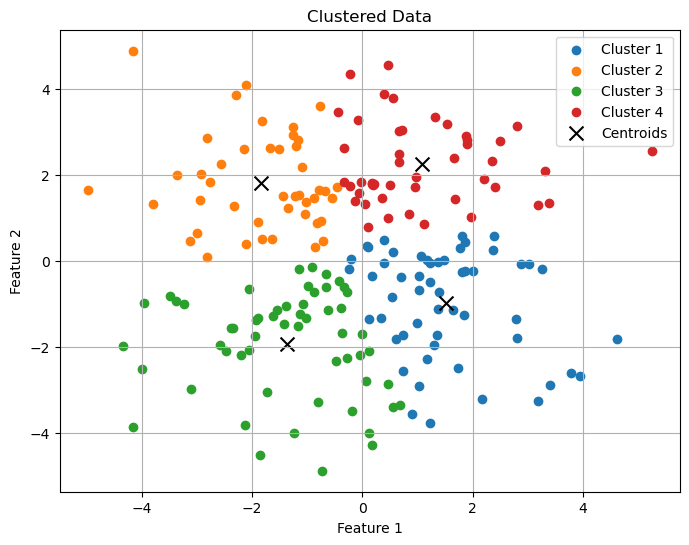

In [12]:
# Perform clustering (KMeans with 4 clusters)
# Fit the model to the data and predict the cluster labels for the data points in X1
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(X1)
labels = kmeans.labels_

# Plot the data with cluster colors
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_points = X1[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label = f'Cluster {i + 1}')
    

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', marker = 'x', s = 100, label = 'Centroids')
plt.title("Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

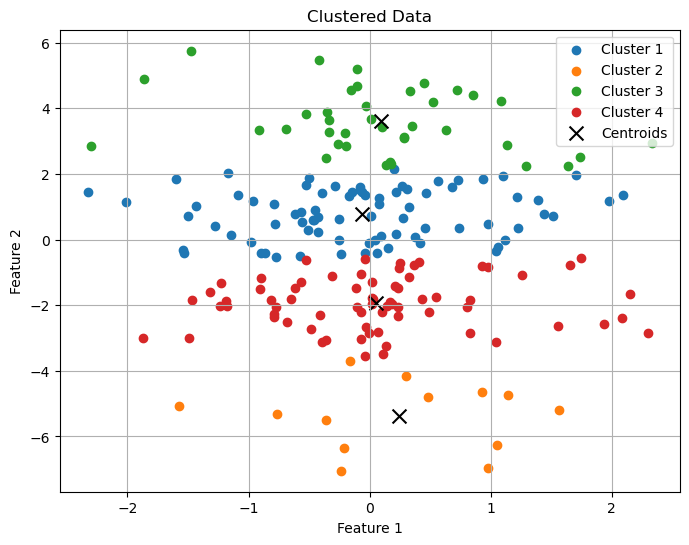

In [15]:
# Perform clustering (KMeans with 4 clusters)
# Fit the model to the data and predict the cluster labels for the data points in X2
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(X2)
labels = kmeans.labels_

# Plot the data with cluster colors
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_points = X2[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label = f'Cluster {i + 1}')
    

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', marker = 'x', s = 100, label = 'Centroids')
plt.title("Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

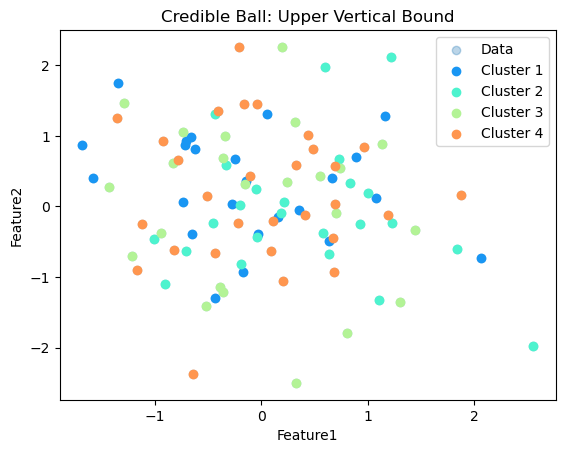

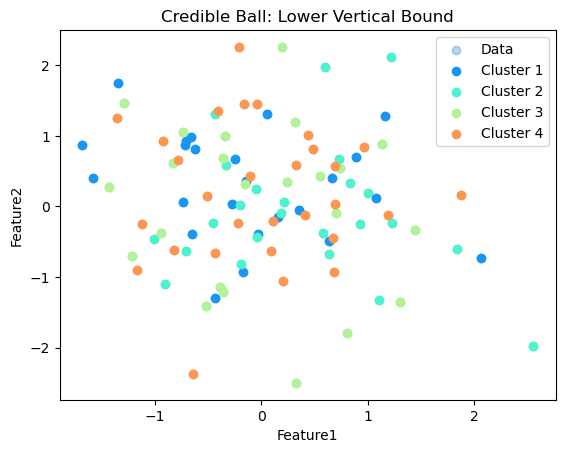

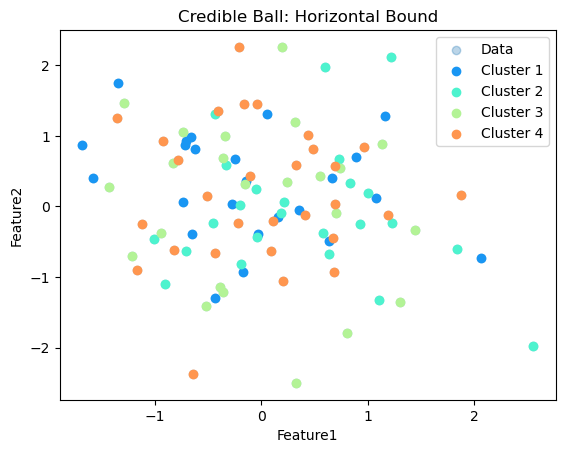

In [7]:
n_samples = 100
sigma = [0.5, 0.5]
data = generate_data(n_samples, sigma)

# Simuler un clustering optimal et des échantillons de clustering
n_clusters = 4
c_star = np.random.randint(1, n_clusters + 1, n_samples)
cls_draw = np.random.randint(1, n_clusters + 1, size=(50, n_samples))  # 50 échantillons de clustering

# Calculer la Credible Ball
credible_ball = calculate_credible_ball(c_star, cls_draw, c_dist="VI", alpha=0.05)

# Tracer la Credible Ball
data_df = pd.DataFrame(data, columns=["Feature1", "Feature2"])
plot_credibleball(credible_ball, data_df)